## 01_Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = np.array([[1,2],[3,4],[5,6]])
print(type(data))
print(data)
data = data.astype(float)
print(data.dtype)

<class 'numpy.ndarray'>
[[1 2]
 [3 4]
 [5 6]]
float64


In [9]:
np.sqrt(np.array([-1,0,1]), dtype=complex)

array([0.+1.j, 0.+0.j, 1.+0.j])

In [10]:
x2 = np.full(10,5.4)
x2

array([5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4])

In [12]:
np.empty(3, dtype=float)

array([1., 0., 0.])

In [23]:
x = np.array([-1,0,1])
y = np.array([-2,0,2])
X,Y = np.meshgrid(x,y)
print(X)
print(Y)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-2 -2 -2]
 [ 0  0  0]
 [ 2  2  2]]


In [30]:
# np.identity(3)
# np.eye(3)
np.eye(3,k=0)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
np.diag(np.arange(0,20,5))

array([[ 0,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 15]])

In [33]:
# 특정 함수로 부터 배열 생성
f = lambda m, n: 10*m + n
A = np.fromfunction(f, (6,6), dtype=int)
A

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [38]:
B = A[1:5, 1:5]
B

B[:,:] = 0
A

C = B[1:3,1:3].copy()
C

C[:,:] = 1
C
B

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [39]:
# 특정 행, 열 인덱스 사용
# A[:, 1] # 두번째 열
# A[1, :] # 두번째 행
A[:3,:3]

array([[ 0,  1,  2],
       [10,  0,  0],
       [20,  0,  0]])

In [41]:
data = np.array([[1,2],[3,4]]) # 2 X 2
data = np.reshape(data,(1,4)) # 1 x 4
print(data.shape)

(1, 4)


In [42]:
# flatten
data = np.array([[1,2,4],[3,4,5]])
data = data.flatten()
data

array([1, 2, 4, 3, 4, 5])

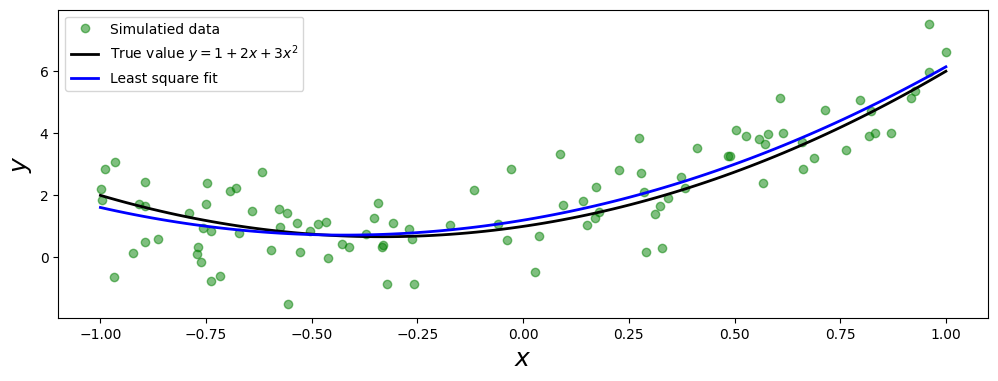

In [1]:
from scipy import linalg as la
from scipy import optimize
# import sympy
# sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
 

# 모델의 참 매개변수 정의
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# 잡음이 있는 데이터 만들기
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# 선형 최소자승을 사용해 데이터 모델 적합
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x**2

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X,Y, 'go', alpha=0.5, label='Simulatied data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y=1+2x+3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

In [9]:
from scipy import linalg as la 
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = np.linspace(-1,1,100)
a,b,c = 1,2,3
y_exact = a + b + x + c * x**2

In [11]:
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b + X + c * X**2 + np.random.randn(m)

In [12]:
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

In [13]:
y_fit = sol[0] + sol[1] * x + sol[2] * x**2

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X,Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x,y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=15)
ax.set_ylabel(r"$y$", fontsize=15)
ax.legend(loc=2)
ax.grid()

In [15]:
# 1차 다항식
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 1차 다항식
A = np.vstack([X**n for n in range(10)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X,Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x,y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [10st order]')
ax.set_xlabel(r"$x$", fontsize=15)
ax.set_xlabel(r"$y$", fontsize=15)
ax.legend(loc=2)